In [33]:
import tensorflow as tf
import numpy as np

In [34]:
base_dir = "data"

In [35]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

#pre-processing
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale= 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale= 1./255,
    validation_split=0.1
)
train_datagen = train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE,
    subset= 'training',
)
test_datagen = test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE,
    subset='validation',
)

Found 1882 images belonging to 19 classes.


Found 199 images belonging to 19 classes.


In [36]:
cnn = tf.keras.Sequential()

In [37]:
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(224,224,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(19,activation='softmax'))
 

In [38]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
hist = cnn.fit(train_datagen,epochs=100,validation_data=test_datagen)

Epoch 1/100
30/30 [==============================] - 56s 2s/step - loss: 9.8919 - accuracy: 0.0600 - val_loss: 2.9340 - val_accuracy: 0.0804
Epoch 2/100
30/30 [==============================] - 46s 2s/step - loss: 2.8187 - accuracy: 0.1174 - val_loss: 2.8049 - val_accuracy: 0.1357
Epoch 3/100
30/30 [==============================] - 41s 1s/step - loss: 2.6149 - accuracy: 0.2168 - val_loss: 2.7154 - val_accuracy: 0.1709
Epoch 4/100
30/30 [==============================] - 40s 1s/step - loss: 2.4368 - accuracy: 0.2806 - val_loss: 2.5885 - val_accuracy: 0.1709
Epoch 5/100
30/30 [==============================] - 41s 1s/step - loss: 2.2933 - accuracy: 0.3236 - val_loss: 2.5254 - val_accuracy: 0.2663
Epoch 6/100
30/30 [==============================] - 41s 1s/step - loss: 2.1484 - accuracy: 0.3618 - val_loss: 2.5253 - val_accuracy: 0.2312
Epoch 7/100
30/30 [==============================] - 40s 1s/step - loss: 2.0247 - accuracy: 0.4166 - val_loss: 2.5277 - val_accuracy: 0.2462
Epoch 8/100
3

In [40]:
hist.history

{'loss': [9.891905784606934,
  2.8186557292938232,
  2.614910125732422,
  2.4368398189544678,
  2.293339490890503,
  2.1483712196350098,
  2.0247280597686768,
  1.921489953994751,
  1.815663456916809,
  1.7216211557388306,
  1.6134631633758545,
  1.5520939826965332,
  1.4877854585647583,
  1.401858925819397,
  1.3536659479141235,
  1.310002326965332,
  1.300062894821167,
  1.1578290462493896,
  1.1205636262893677,
  1.031938910484314,
  1.0458208322525024,
  0.9668818712234497,
  0.9514816403388977,
  0.9491041898727417,
  0.8827797174453735,
  0.8292458057403564,
  0.8047575354576111,
  0.7573768496513367,
  0.7501377463340759,
  0.7252081632614136,
  0.7189013957977295,
  0.7164682149887085,
  0.6630042791366577,
  0.6670545935630798,
  0.6120135188102722,
  0.5844486355781555,
  0.5407705903053284,
  0.5531095266342163,
  0.5353472232818604,
  0.5194531083106995,
  0.5436631441116333,
  0.5268093943595886,
  0.4570850133895874,
  0.47955822944641113,
  0.47396332025527954,
  0.44443

In [41]:
import matplotlib.pyplot as plt

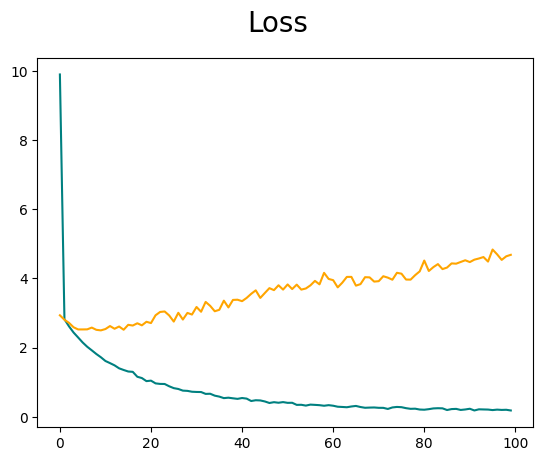

In [42]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.show()

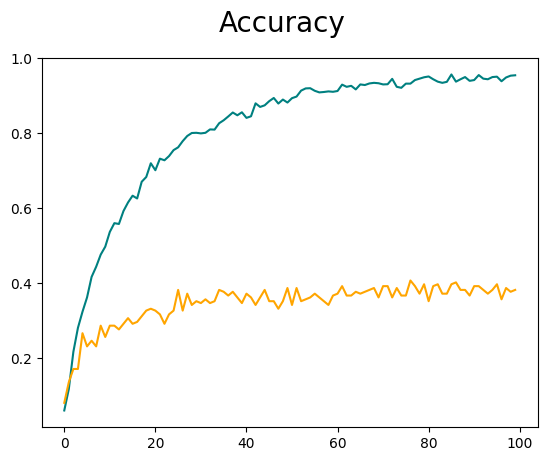

In [43]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.show()

In [44]:
from sklearn.metrics import precision_score, recall_score
import numpy as np

predictions = cnn.predict(test_datagen)

predicted_labels = np.argmax(predictions,axis=1)
true_labels = test_datagen.classes

precision = precision_score(true_labels,predicted_labels,average='weighted')

recall = recall_score(true_labels,predicted_labels,average='weighted')

print(f"Precsion Score: {precision}")
print(f"Recall Score: {recall}")

4/4 [==============================] - 4s 797ms/step
Precsion Score: 0.051454688773636445
Recall Score: 0.05025125628140704


In [57]:
class_names = train_datagen.class_indices
label_to_class = {v: k for k, v in class_names.items()}

In [59]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load ảnh mới
new_image_path = 'test1.jpg'
img = load_img(new_image_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Chuẩn hóa ảnh

# Dự đoán nhãn của ảnh mới
predictions = cnn.predict(img_array)

# Chuyển đổi dự đoán từ one-hot encoding sang nhãn
predicted_label = np.argmax(predictions, axis=1)
predicted_label = predicted_label.astype(int)
label = predicted_label[0]
predicted_class_name = label_to_class[label]
print(f'Predicted class name: {predicted_class_name}')
#rau muong là 8
#rau mùi là 12
#rau mùi tàu là 13
#rau rong biển là 18


1/1 [==============================] - 0s 44ms/step
Predicted class name: rau mui


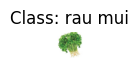

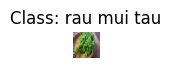

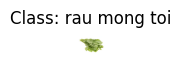

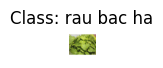

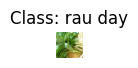

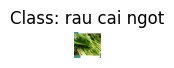

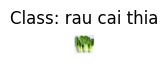

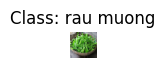

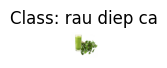

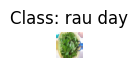

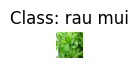

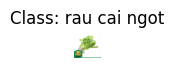

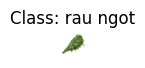

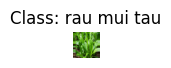

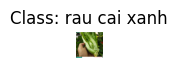

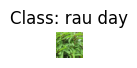

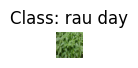

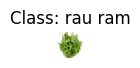

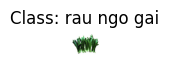

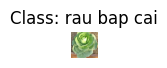

In [50]:
import matplotlib.pyplot as plt

# Lấy các lớp (class) từ tập dữ liệu huấn luyện và chuyển chúng thành một danh sách
class_names = list(train_datagen.class_indices.keys())

# Lấy một batch hình ảnh từ tập dữ liệu huấn luyện
images, labels = next(train_datagen)

# Hiển thị một số hình ảnh và nhãn tương ứng
num_images_to_display = 20  # Số hình ảnh bạn muốn hiển thị
for i in range(num_images_to_display):
    plt.figure(figsize=(8, 8))
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(images[i])
    plt.title(f'Class: {class_names[labels[i].argmax()]}')
    plt.axis('off')
plt.show()
